# Overview
In this project, we will be looking at the player data provided by FIFA which contains information such as personal details, wages, physical attributes, technical skills, potential, and positional strengths. This is primarily data of FIFA 2018. Through this project, you will get a glimpse of insights behind the beautiful game and the kind of information and decisions a football manager goes through.

# Objective
Preliminary Data Analysis. Explore the dataset and practice extracting basic observations about the data. The idea is for you to get comfortable working in Python.
You are expected to do the following :
Come up with the players' profile (characteristics of a player) of the different teams/countries.
Generate a set of insights and recommendations that will help the coach to understand the competition.

Data Dictionary:
Feature Explanation
player index number
 
Name- name of a player
Age - age of a player
Nationality - player nationality
 
Overall - Overall Rating of the player
Potential -Potential Rating of the player
Club - The international club for which the player plays
 
Value - The market value of the player in the transfer market

## Player Skills and other self-explanatory attributes
Special

Wage

Acceleration

Aggression

Agility

Balance

Ball control

Composure

Crossing

Curve

Dribbling

Finishing

Free kick accuracy

GK diving

GK handling

GK kicking

GK positioning

GK reflexes

Heading accuracy

Interceptions

Jumping

Long passing

Long shots

Marking

Penalties

Positioning

Reactions

Short passing

Shot power

Sliding tackle

Sprint speed

Stamina

Standing tackle

Strength

Vision

Volleys

CAM -Center Attacking Midfielder

CB - Center Back

CDM - Center Defensive Midfielder

CF - Center Forward

CM -Center Midfielder

ID - Player's ID in FIFA18

LAM - Left Attacking Midfielder

LB - Left Back

LCB - Left Center Back

LCM - Left Center Midfielder

LDM - Left Defensive Midfielder

LF -Left Forward

LM -Left Midfielder

LS -Left Striker

LW - Left-Wing

LWB - Left-Wing Back

Preferred Positions - Player's Preferred Position

RAM - Right Attacking Midfielder

RB - Right Back

RCB - Right Center Back

RCM - Right Center Midfielder

RDM - Right Defensive Midfielder

RF - Right Forward

RM - Right Midfielder

RS - Right Striker

RW - Right Wing

RWB - Right Wing Back

ST - Striker


Importing Packages and creating dataframe

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
warnings.filterwarnings('ignore')
fifa=pd.read_excel("FIFA.xlsx")
df = fifa.copy()

check how many rows and columns are in the dataset

In [2]:
df.shape

(17981, 74)

## Describe the dataset to get the stats of each column

In [3]:
df.describe()

Unnamed: 0      Age  Overall  Potential  Special      CAM       CB  \
count    17981.00 17981.00 17981.00   17981.00 17981.00 15952.00 15952.00   
mean      8990.00    25.14    66.25      71.19  1594.10    59.25    55.55   
std       5190.81     4.61     6.99       6.10   272.15     9.88    12.19   
min          0.00    16.00    46.00      46.00   728.00    27.00    25.00   
25%       4495.00    21.00    62.00      67.00  1449.00    53.00    45.00   
50%       8990.00    25.00    66.00      71.00  1633.00    60.00    57.00   
75%      13485.00    28.00    71.00      75.00  1786.00    66.00    65.00   
max      17980.00    47.00    94.00      94.00  2291.00    92.00    87.00   

           CDM       CF       CM      LAM       LB      LCB      LCM      LDM  \
count 15952.00 15952.00 15952.00 15952.00 15952.00 15952.00 15952.00 15952.00   
mean     56.87    59.03    58.51    59.25    56.98    55.55    58.51    56.87   
std      10.31     9.93     8.89     9.88     9.79    12.19     8.89    10.31   
min      26.00    27.00    30.00    27.00    30.00    25.00    30.00    26.00   
25%      49.00    53.00    53.00    53.00    50.00    45.00    53.00    49.00   
50%      58.00    60.00    59.00    60.00    58.00    57.00    59.00    58.00   
75%      65.00    66.00    65.00    66.00    64.00    65.00    65.00    65.00   
max      85.00    92.00    87.00    92.00    84.00    87.00    87.00    85.00   

            LF       LM       LS       LW      LWB      RAM       RB      RCB  \
count 15952.00 15952.00 15952.00 15952.00 15952.00 15952.00 15952.00 15952.00   
mean     59.03    60.06    58.20    59.36    57.70    59.25    56.98    55.55   
std       9.93     9.35     9.18     9.98     9.14     9.88     9.79    12.19   
min      27.00    28.00    31.00    26.00    31.00    27.00    30.00    25.00   
25%      53.00    54.00    52.00    53.00    51.00    53.00    50.00    45.00   
50%      60.00    61.00    59.00    60.00    58.00    60.00    58.00    57.00   
75%      66.00    67.00    65.00    66.00    64.00    66.00    64.00    65.00   
max      92.00    90.00    92.00    91.00    84.00    92.00    84.00    87.00   

           RCM      RDM       RF       RM       RS       RW      RWB       ST  
count 15952.00 15952.00 15952.00 15952.00 15952.00 15952.00 15952.00 15952.00  
mean     58.51    56.87    59.03    60.06    58.20    59.36    57.70    58.20  
std       8.89    10.31     9.93     9.35     9.18     9.98     9.14     9.18  
min      30.00    26.00    27.00    28.00    31.00    26.00    31.00    31.00  
25%      53.00    49.00    53.00    54.00    52.00    53.00    51.00    52.00  
50%      59.00    58.00    60.00    61.00    59.00    60.00    58.00    59.00  
75%      65.00    65.00    66.00    67.00    65.00    66.00    64.00    65.00  
max      87.00    85.00    92.00    90.00    92.00    91.00    84.00    92.00

See what the data types are for each column

## Create new Position column to hold other prefered positions if player has more than one, and show that the column was created.

In [4]:
df['Position'] = df['Preferred Positions'].apply(lambda x: x[:3].strip())
pd.set_option('display.max_columns', None)
df.head()

Unnamed: 0               Name  Age  \
0           0  Cristiano Ronaldo   32   
1           1           L. Messi   30   
2           2             Neymar   25   
3           3         L. SuÃ¡rez   30   
4           4           M. Neuer   31   

                                             Photo Nationality  \
0   https://cdn.sofifa.org/48/18/players/20801.png    Portugal   
1  https://cdn.sofifa.org/48/18/players/158023.png   Argentina   
2  https://cdn.sofifa.org/48/18/players/190871.png      Brazil   
3  https://cdn.sofifa.org/48/18/players/176580.png     Uruguay   
4  https://cdn.sofifa.org/48/18/players/167495.png     Germany   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/38.png       94         94   
1  https://cdn.sofifa.org/flags/52.png       93         93   
2  https://cdn.sofifa.org/flags/54.png       92         94   
3  https://cdn.sofifa.org/flags/60.png       92         92   
4  https://cdn.sofifa.org/flags/21.png       92         92   

                  Club                                   Club Logo  Value  \
0       Real Madrid CF  https://cdn.sofifa.org/24/18/teams/243.png  95.5M   
1         FC Barcelona  https://cdn.sofifa.org/24/18/teams/241.png   105M   
2  Paris Saint-Germain   https://cdn.sofifa.org/24/18/teams/73.png   123M   
3         FC Barcelona  https://cdn.sofifa.org/24/18/teams/241.png    97M   
4     FC Bayern Munich   https://cdn.sofifa.org/24/18/teams/21.png    61M   

   Wage  Special Acceleration Aggression Agility Balance Ball control  \
0  565K     2228           89         63      89      63           93   
1  565K     2154           92         48      90      95           95   
2  280K     2100           94         56      96      82           95   
3  510K     2291           88         78      86      60           91   
4  230K     1493           58         29      52      35           48   

  Composure Crossing Curve Dribbling Finishing Free kick accuracy GK diving  \
0        95       85    81        91        94                 76         7   
1        96       77    89        97        95                 90         6   
2        92       75    81        96        89                 84         9   
3        83       77    86        86        94                 84        27   
4        70       15    14        30        13                 11        91   

  GK handling GK kicking GK positioning GK reflexes Heading accuracy  \
0          11         15             14          11               88   
1          11         15             14           8               71   
2           9         15             15          11               62   
3          25         31             33          37               77   
4          90         95             91          89               25   

  Interceptions Jumping Long passing Long shots Marking Penalties Positioning  \
0            29      95           77         92      22        85          95   
1            22      68           87         88      13        74          93   
2            36      61           75         77      21        81          90   
3            41      69           64         86      30        85          92   
4            30      78           59         16      10        47          12   

  Reactions Short passing Shot power Sliding tackle Sprint speed Stamina  \
0        96            83         94             23           91      92   
1        95            88         85             26           87      73   
2        88            81         80             33           90      78   
3        93            83         87             38           77      89   
4        85            55         25             11           61      44   

  Standing tackle Strength Vision Volleys   CAM    CB   CDM    CF    CM   LAM  \
0              31       80     85      88 89.00 53.00 62.00 91.00 82.00 89.00   
1              28       59     90      85 92.00 45.00 59.00 92.00 84.0

# Convert columns to numerical types

In [5]:
columns_to_numerical = ['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve',
                       'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking', 'GK positioning',
                       'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning',
                       'Reactions', 'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys'
                       ]

df['Value'] = df['Value'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)
df['Wage'] = df['Wage'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)

for col in columns_to_numerical:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 75 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           17981 non-null  int64  
 1   Name                 17981 non-null  object 
 2   Age                  17981 non-null  int64  
 3   Photo                17981 non-null  object 
 4   Nationality          17981 non-null  object 
 5   Flag                 17981 non-null  object 
 6   Overall              17981 non-null  int64  
 7   Potential            17981 non-null  int64  
 8   Club                 17733 non-null  object 
 9   Club Logo            17981 non-null  object 
 10  Value                17981 non-null  int32  
 11  Wage                 17981 non-null  int32  
 12  Special              17981 non-null  int64  
 13  Acceleration         17897 non-null  float64
 14  Aggression           17913 non-null  float64
 15  Agility              17910 non-null 

# Reduce dimension by combining position types and stats

In [7]:
position_cols = [
    'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
    'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
    'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
    'LCB', 'CB', 'RCB', 'RB'
]

positiontype_to_cols = {
    'Attack': ['LS', 'ST', 'RS', 'LF', 'CF', 'RF'],
    'Midfield': ['LW', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'CDM', 'RDM', 'LDM'],
    'Defense': ['LWB', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
}

for pos_type, colvec in positiontype_to_cols.items():
    df[pos_type + '_rate'] = round(df[colvec].mean(axis=1, skipna='true'))
    
summaryname_to_cols = {
    'Passing': ['Crossing', 'Short passing', 'Long passing'],
    'Shooting': ['Finishing', 'Volleys', 'Free kick accuracy', 'Shot power',
                 'Long shots', 'Penalties', 'Heading accuracy'],
    'Defending': ['Marking', 'Standing tackle', 'Sliding tackle', 'Interceptions'],
    'Speed': ['Sprint speed', 'Agility', 'Acceleration', 'Reactions', 'Stamina'],
    'Control': ['Ball control', 'Curve', 'Dribbling'],
    'GoalKeeping': ['GK diving', 'GK handling', 'GK positioning', 'GK kicking', 'GK reflexes'],
    'Mental': ['Composure', 'Vision', 'Aggression', 'Positioning'],
    'Power': ['Strength', 'Balance', 'Jumping'],
    'Avg_rating': ['Overall', 'Potential']
    
}

for summarycol, colvec in summaryname_to_cols.items():
    df[summarycol] = round(df[colvec].mean(axis=1, skipna='true'))
    
df.drop(position_cols, axis=1, inplace=True)
    
cols_to_drop = [colname for colvec in summaryname_to_cols.values() for colname in colvec]
df.drop(cols_to_drop, axis=1, inplace=True)

In [8]:
cols_to_remove = ['Photo', 'Flag', 'Club Logo']
df.drop(cols_to_remove, axis=1, inplace=True)

In [9]:
df.shape

(17981, 22)

In [10]:
df.describe()

Unnamed: 0      Age        Value      Wage  Special  Attack_rate  \
count    17981.00 17981.00     17981.00  17981.00 17981.00     15952.00   
mean      8990.00    25.14   2385389.58  11546.97  1594.10        58.62   
std       5190.81     4.61   5353969.97  23080.00   272.15         9.48   
min          0.00    16.00         0.00      0.00   728.00        30.00   
25%       4495.00    21.00    300000.00   2000.00  1449.00        52.00   
50%       8990.00    25.00    675000.00   4000.00  1633.00        60.00   
75%      13485.00    28.00   2100000.00  12000.00  1786.00        66.00   
max      17980.00    47.00 123000000.00 565000.00  2291.00        92.00   

       Midfield_rate  Defense_rate  Passing  Shooting  Defending    Speed  \
count       15952.00      15952.00 17954.00  17977.00   17955.00 17974.00   
mean           58.67         56.57    53.47     47.96      45.89    63.59   
std             8.28         10.33    15.31     15.58      20.97    11.33   
min            31.00         28.00    10.00      7.00       6.00    23.00   
25%            53.00         49.00    46.00     39.00      25.00    58.00   
50%            59.00         58.00    57.00     51.00      51.00    66.00   
75%            64.00         65.00    64.00     59.00      64.00    72.00   
max            84.00         84.00    89.00     88.00      90.00    91.00   

       Control  GoalKeeping   Mental    Power  Avg_rating  
count 17960.00     17978.00 17975.00 17970.00    17981.00  
mean     53.46        16.59    54.07    64.65       68.72  
std      17.29        17.09    13.00     7.47        6.02  
min       6.00         1.00    11.00    25.00       46.00  
25%      46.00        10.00    48.00    60.00       65.00  
50%      57.00        11.00    56.00    65.00       68.00  
75%      66.00        12.00    63.00    70.00       72.00  
max      94.00        91.00    86.00    90.00       94.00

# In the dataframe there are 2029 rows where there is no attack defense or midfield rate.

In [11]:
df.isnull().sum().sort_values(ascending=False)

Attack_rate            2029
Defense_rate           2029
Midfield_rate          2029
Club                    248
Passing                  27
Defending                26
Control                  21
Power                    11
Speed                     7
Mental                    6
Shooting                  4
GoalKeeping               3
Value                     0
Name                      0
Age                       0
Nationality               0
Avg_rating                0
Wage                      0
Special                   0
Preferred Positions       0
Position                  0
Unnamed: 0                0
dtype: int64

In [12]:
df[df['GoalKeeping'].isnull()]

Unnamed: 0           Name  Age     Nationality                Club  \
1784         1784       A. Blake   26         Jamaica  Philadelphia Union   
11784       11784  Kang Hyeon Mu   22  Korea Republic     Pohang Steelers   
17007       17007      A. Wichne   20          Norway           Viking FK   

         Value  Wage  Special Preferred Positions Position  Attack_rate  \
1784   6500000  7000     1146                 GK        GK          nan   
11784   550000  2000     1097                 GK        GK          nan   
17007   110000  1000     1032                 GK        GK          nan   

       Midfield_rate  Defense_rate  Passing  Shooting  Defending  Speed  \
1784             nan           nan    26.00     15.00      14.00  54.00   
11784            nan           nan    22.00     18.00      19.00  40.00   
17007            nan           nan    25.00     18.00      16.00  43.00   

       Control  GoalKeeping  Mental  Power  Avg_rating  
1784     21.00          nan   23.00  56.00       78.00  
11784    19.00          nan   35.00  56.00       69.00  
17007    14.00          nan   27.00  57.00       60.00

In [13]:
df[df['Position'] == 'GK'].isnull().sum().sort_values(ascending=False)

Attack_rate            2029
Defense_rate           2029
Midfield_rate          2029
Club                     42
GoalKeeping               3
Mental                    1
Speed                     1
Power                     1
Special                   0
Name                      0
Age                       0
Nationality               0
Value                     0
Wage                      0
Avg_rating                0
Preferred Positions       0
Position                  0
Passing                   0
Shooting                  0
Defending                 0
Control                   0
Unnamed: 0                0
dtype: int64

# There are also 2029 Goalkeepers in the data set, and they represent 100% of those 3 null values

# Treat missing values

In [14]:
df[df['GoalKeeping'].isnull()]

Unnamed: 0           Name  Age     Nationality                Club  \
1784         1784       A. Blake   26         Jamaica  Philadelphia Union   
11784       11784  Kang Hyeon Mu   22  Korea Republic     Pohang Steelers   
17007       17007      A. Wichne   20          Norway           Viking FK   

         Value  Wage  Special Preferred Positions Position  Attack_rate  \
1784   6500000  7000     1146                 GK        GK          nan   
11784   550000  2000     1097                 GK        GK          nan   
17007   110000  1000     1032                 GK        GK          nan   

       Midfield_rate  Defense_rate  Passing  Shooting  Defending  Speed  \
1784             nan           nan    26.00     15.00      14.00  54.00   
11784            nan           nan    22.00     18.00      19.00  40.00   
17007            nan           nan    25.00     18.00      16.00  43.00   

       Control  GoalKeeping  Mental  Power  Avg_rating  
1784     21.00          nan   23.00  56.00       78.00  
11784    19.00          nan   35.00  56.00       69.00  
17007    14.00          nan   27.00  57.00       60.00

In [15]:
df.drop(df[df['GoalKeeping'].isnull()].index, inplace = True)

There are 3 rows missing this stat, and they are goal keepers, so remove these rows.

In [16]:
df['Mental'] = df['Mental'].replace(np.NaN, df['Mental'].mean())
df['Passing'] = df['Passing'].replace(np.NaN, df['Passing'].mean())
df['Defending'] = df['Defending'].replace(np.NaN, df['Defending'].mean())
df['Control'] = df['Control'].replace(np.NaN, df['Control'].mean())
df['Power'] = df['Power'].replace(np.NaN, df['Power'].mean())
df['Speed'] = df['Speed'].replace(np.NaN, df['Speed'].mean())
df['Shooting'] = df['Shooting'].replace(np.NaN, df['Shooting'].mean())

There are a few rows that have missing values, and since there are a lot less than the total rows i set them to the mean.

In [17]:
df.isnull().sum().sort_values(ascending=False)

Attack_rate            2026
Defense_rate           2026
Midfield_rate          2026
Club                    248
Position                  0
Name                      0
Age                       0
Nationality               0
Value                     0
Wage                      0
Special                   0
Preferred Positions       0
Avg_rating                0
Power                     0
Passing                   0
Shooting                  0
Defending                 0
Speed                     0
Control                   0
GoalKeeping               0
Mental                    0
Unnamed: 0                0
dtype: int64

In [18]:
dfGK = df[df['Position'] == 'GK']

In [19]:
dfGK.describe(include = 'all')

Unnamed: 0        Name     Age Nationality         Club       Value  \
count      2026.00        2026 2026.00        2026         1984     2026.00   
unique         nan        2004     nan          95          647         nan   
top            nan  K. MÃ¼ller     nan     England  Bournemouth         nan   
freq           nan           2     nan         175            6         nan   
mean      10108.90         NaN   26.08         NaN          NaN  1571771.96   
std        5471.43         NaN    5.40         NaN          NaN  4296770.16   
min           4.00         NaN   16.00         NaN          NaN        0.00   
25%        5421.50         NaN   22.00         NaN          NaN   140000.00   
50%       10820.00         NaN   26.00         NaN          NaN   375000.00   
75%       15160.00         NaN   30.00         NaN          NaN   975000.00   
max       17977.00         NaN   47.00         NaN          NaN 64500000.00   

            Wage  Special Preferred Positions Position  Attack_rate  \
count    2026.00  2026.00                2026     2026         0.00   
unique       nan      nan                   1        1          nan   
top          nan      nan                 GK        GK          nan   
freq         nan      nan                2026     2026          nan   
mean     7861.80  1050.36                 NaN      NaN          nan   
std     16392.97   126.67                 NaN      NaN          nan   
min         0.00   728.00                 NaN      NaN          nan   
25%      1000.00   970.25                 NaN      NaN          nan   
50%      2000.00  1063.00                 NaN      NaN          nan   
75%      7000.00  1134.75                 NaN      NaN          nan   
max    230000.00  1493.00                 NaN      NaN          nan   

        Midfield_rate  Defense_rate  Passing  Shooting  Defending   Speed  \
count            0.00          0.00  2026.00   2026.00    2026.00 2026.00   
unique            nan           nan      nan       nan        nan     nan   
top               nan           nan      nan       nan        nan     nan   
freq              nan           nan      nan       nan        nan     nan   
mean              nan           nan    22.28     15.82      14.67   41.76   
std               nan           nan     5.10      3.26       3.12    7.92   
min               nan           nan    10.00      7.00       6.00   23.00   
25%               nan           nan    19.00     14.00      12.00   37.00   
50%               nan           nan    21.00     16.00      15.00   42.00   
75%               nan           nan    25.00     18.00      17.00   47.00   
max               nan           nan    49.00     35.00      29.00   63.59   

        Control  GoalKeeping  Mental   Power  Avg_rating  
count   2026.00      2026.00 2026.00 2026.00     2026.00  
unique      nan          nan     nan     nan         nan  
top         nan          nan     nan     nan         nan  
freq        nan          nan     nan     nan         nan  
mean      16.30        63.83   27.77   54.19       67.21  
std        3.54         7.39    6.60    7.65        6.57  
min        6.00        43.00   11.00   25.00       46.00  
25%       14.00        59.00   23.00   50.00       63.00  
50%       16.00        64.00   26.00   55.00       67.00  
75%       18.00        69.00   32.00   60.00       72.00  
max       35.00        91.00   54.07   74.00       92.00

# Univariate Analysis

In [20]:
#Qucik summary of each column
df.describe().T

count       mean        std    min       25%       50%  \
Unnamed: 0    17978.00    8989.80    5190.58   0.00   4495.25   8989.50   
Age           17978.00      25.14       4.61  16.00     21.00     25.00   
Value         17978.00 2385389.36 5354284.35   0.00 300000.00 675000.00   
Wage          17978.00   11548.34   23081.66   0.00   2000.00   4000.00   
Special       17978.00    1594.18     272.10 728.00   1449.00   1633.00   
Attack_rate   15952.00      58.62       9.48  30.00     52.00     60.00   
Midfield_rate 15952.00      58.67       8.28  31.00     53.00     59.00   
Defense_rate  15952.00      56.57      10.33  28.00     49.00     58.00   
Passing       17978.00      53.48      15.29  10.00     46.00     57.00   
Shooting      17978.00      47.97      15.57   7.00     39.00     51.00   
Defending     17978.00      45.90      20.95   6.00     25.00     51.00   
Speed         17978.00      63.59      11.33  23.00     58.00     66.00   
Control       17978.00      53.47      17.28   6.00     46.00     57.00   
GoalKeeping   17978.00      16.59      17.09   1.00     10.00     11.00   
Mental        17978.00      54.07      13.00  11.00     48.00     56.00   
Power         17978.00      64.66       7.47  25.00     60.00     65.00   
Avg_rating    17978.00      68.72       6.02  46.00     65.00     68.00   

                     75%          max  
Unnamed: 0      13484.75     17980.00  
Age                28.00        47.00  
Value         2100000.00 123000000.00  
Wage            12000.00    565000.00  
Special          1786.00      2291.00  
Attack_rate        66.00        92.00  
Midfield_rate      64.00        84.00  
Defense_rate       65.00        84.00  
Passing            64.00        89.00  
Shooting           59.00        88.00  
Defending          64.00        90.00  
Speed              72.00        91.00  
Control            66.00        94.00  
GoalKeeping        12.00        91.00  
Mental             63.00        86.00  
Power              70.00        90.00  
Avg_rating         72.00        94.00

In [21]:
def boxplot(column): 
    sns.boxplot(column, showmeans=True, color='yellow') # boxplot will be created and a star will indicate the mean value of the column
    
def histogram(column):
    sns.distplot(column, color="blue", kde=False)

# Value

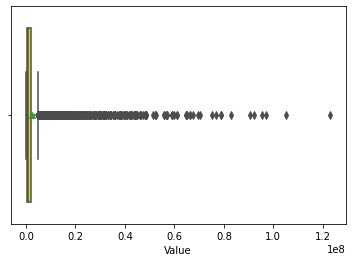

In [22]:
boxplot(df['Value'])

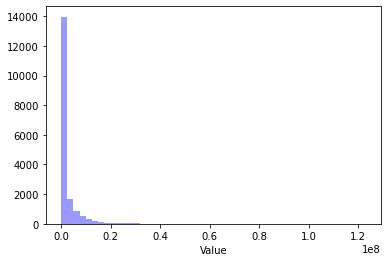

In [23]:
histogram(df['Value'])

In [24]:
df[df['Value'] > 650000].count()

Unnamed: 0             9253
Name                   9253
Age                    9253
Nationality            9253
Club                   9253
Value                  9253
Wage                   9253
Special                9253
Preferred Positions    9253
Position               9253
Attack_rate            8574
Midfield_rate          8574
Defense_rate           8574
Passing                9253
Shooting               9253
Defending              9253
Speed                  9253
Control                9253
GoalKeeping            9253
Mental                 9253
Power                  9253
Avg_rating             9253
dtype: int64

Value is right skewed with some players making drastically more than the average.

# Wage

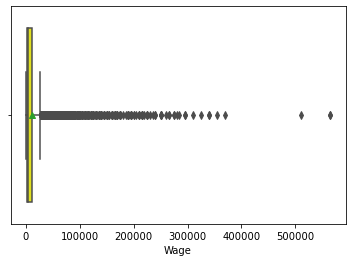

In [25]:
boxplot(df['Wage'])

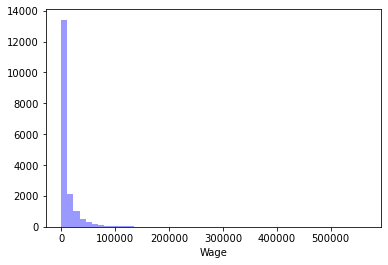

In [26]:
histogram(df['Wage'])

Wage is similar to Value in taht it is right skewed.

# Special

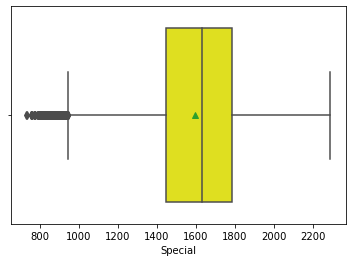

In [27]:
boxplot(df['Special'])

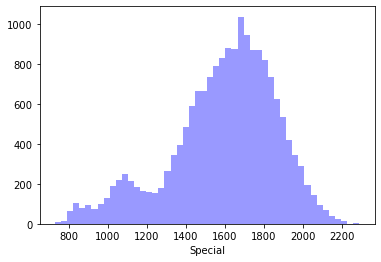

In [28]:
histogram(df['Special'])

Special is slightly left skewed

# Attack Rate

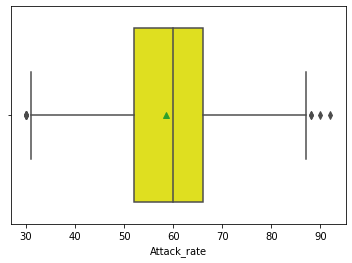

In [29]:
boxplot(df['Attack_rate'])

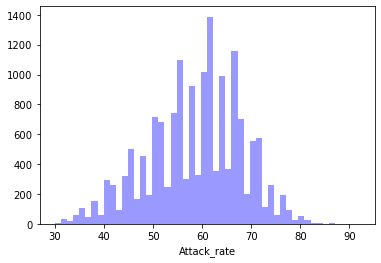

In [30]:
histogram(df['Attack_rate'])

Attack Rate is slightly left skewed, with a few minorm outliers on either side.

# Defense Rate

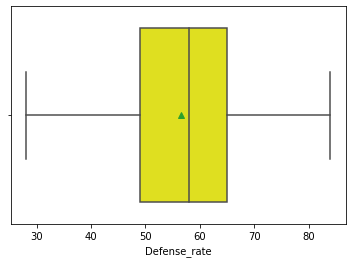

In [31]:
boxplot(df['Defense_rate'])

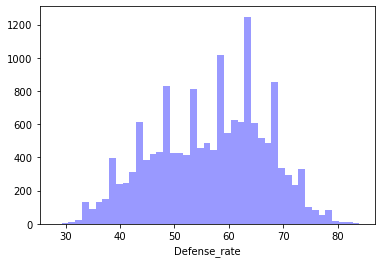

In [32]:
histogram(df['Defense_rate'])

Defense Rate is close to symetrical, with no outliers.

# Midfield Rate

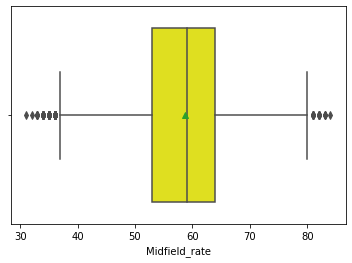

In [33]:
boxplot(df['Midfield_rate'])

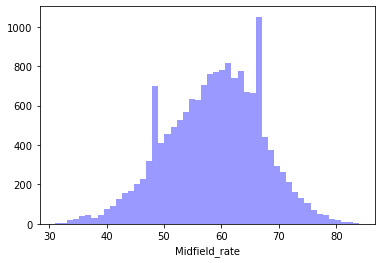

In [34]:
histogram(df['Midfield_rate'])

In [35]:
df['Midfield_rate'].describe()

count   15952.00
mean       58.67
std         8.28
min        31.00
25%        53.00
50%        59.00
75%        64.00
max        84.00
Name: Midfield_rate, dtype: float64

Midfield Rate is symetrical with some outliers on each side of the IQR.

# Passing

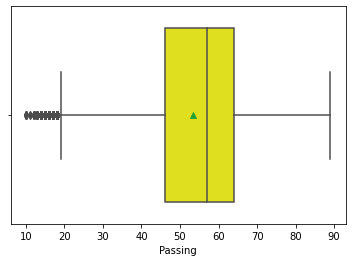

In [36]:
boxplot(df['Passing'])

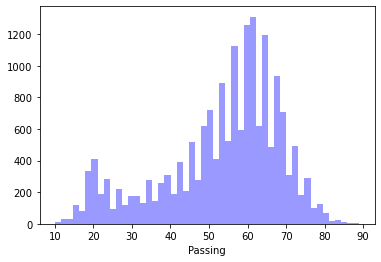

In [37]:
histogram(df['Passing'])

In [38]:
df['Passing'].describe()

count   17978.00
mean       53.48
std        15.29
min        10.00
25%        46.00
50%        57.00
75%        64.00
max        89.00
Name: Passing, dtype: float64

Passing is left skewed with outliers on both sides

# Shooting

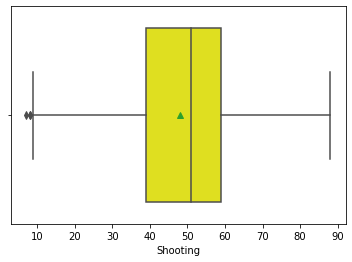

In [39]:
boxplot(df['Shooting'])

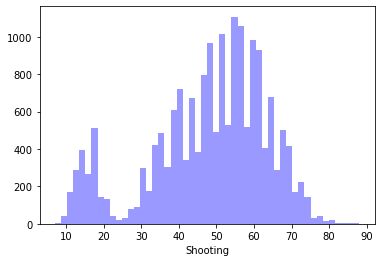

In [40]:
histogram(df['Shooting'])

Shooting is left swkewed with some outliers on the left, probably from people who play positions that dont shoot often

# Defending

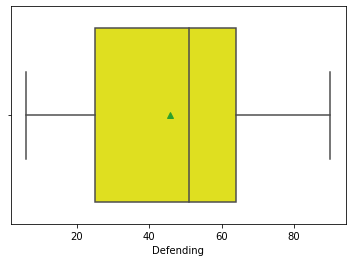

In [41]:
boxplot(df['Defending'])

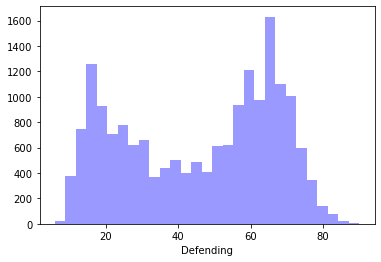

In [42]:
histogram(df['Defending'])

Defending is left skewed with no outliers.

# Speed

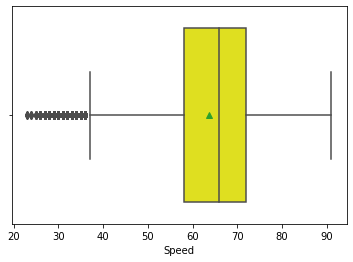

In [43]:
boxplot(df['Speed'])

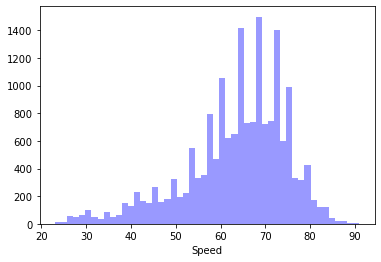

In [44]:
histogram(df['Speed'])

Speed is slightly left skewed with outliers on the left

# Control

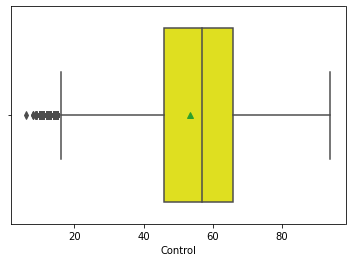

In [45]:
boxplot(df['Control'])

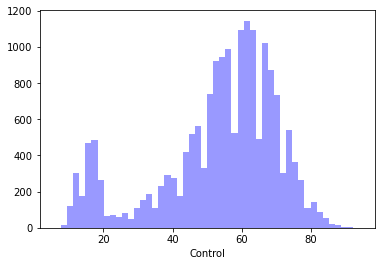

In [46]:
histogram(df['Control'])

Control is left skewed with outliers on the left

# Goalkeeping

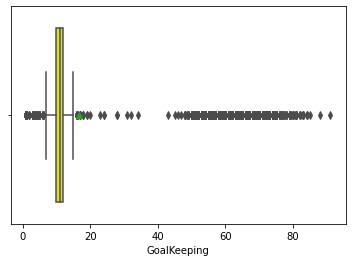

In [47]:
boxplot(df['GoalKeeping'])

I use a seperate dataframe 'dfGK' below which only has players who ahev the Position 'GK', since goalkeeping stat is relevant only to them.

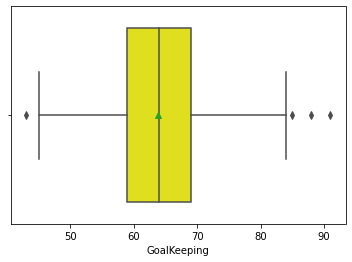

In [48]:
boxplot(dfGK['GoalKeeping'])

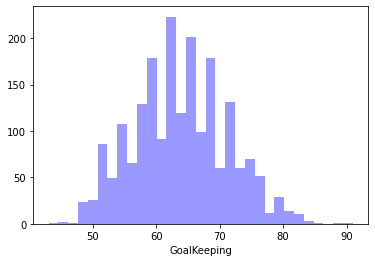

In [49]:
histogram(dfGK['GoalKeeping'])

Goalkeeping is symettrical with a few outliers on each side

# Mental

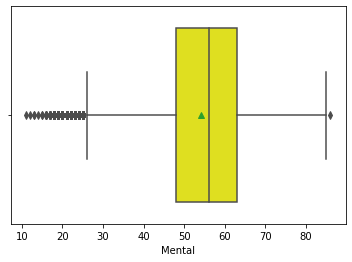

In [50]:
boxplot(df['Mental'])

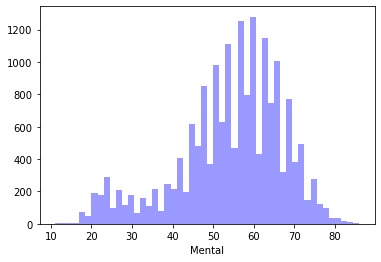

In [51]:
histogram(df['Mental'])

Mental is left skewed with outliers on the left

# Power

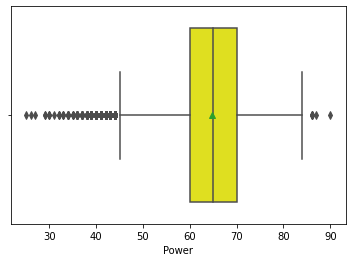

In [52]:
boxplot(df['Power'])

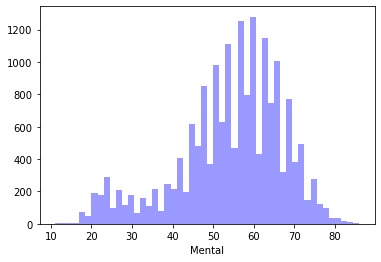

In [53]:
histogram(df['Mental'])

Power is symetrical with outliers on each side

# Average Rating

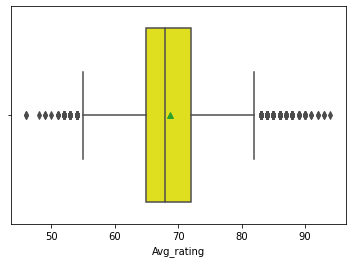

In [54]:
boxplot(df['Avg_rating'])

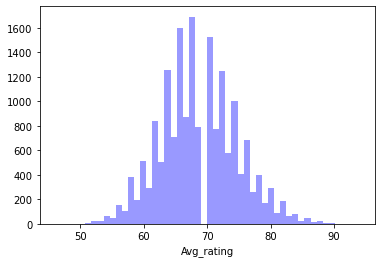

In [55]:
histogram(df['Avg_rating'])

Average rating is roght skewed with outliers on each side

# Bivariate Analysis

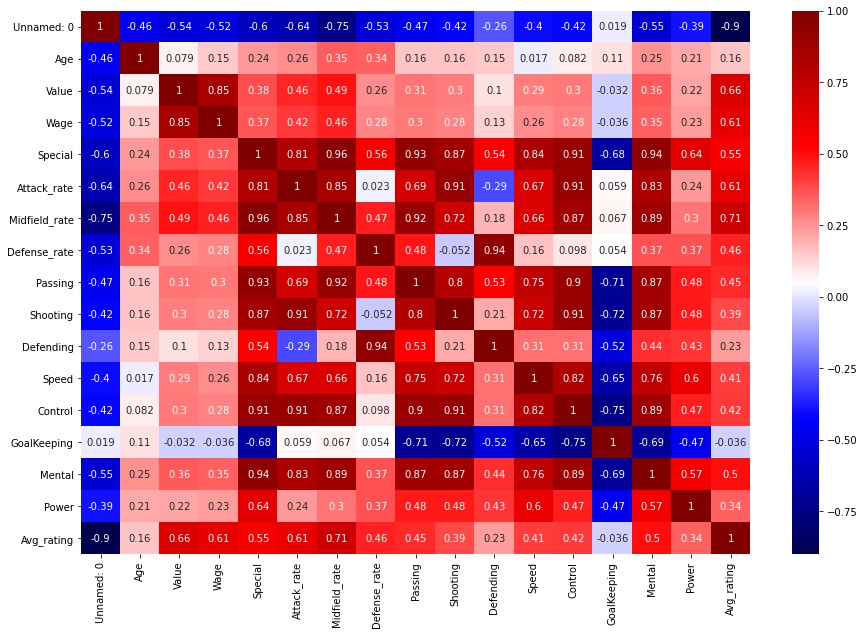

In [56]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, 
            cmap='seismic', annot=True);

Average Rating is highly correlated with Midfield rate, attack rate, and value, showing that players with high skill in attacking or midfield positions are typicaly rated higher. Attack rate is highly correlated to control and shooting ability, as is midfield.

Plottting a few teams against each other since i cant do it for every team

In [57]:
teams = ['Manchester City', 'Barcelona', 'Chelsea FC', 'Juventus']
man = df[df['Club'] == 'Manchester City']
bar = df[df['Club'] == 'Barcelona']
che = df[df['Club'] == 'Chelsea FC']
juv = df[df['Club'] == 'Juventus']

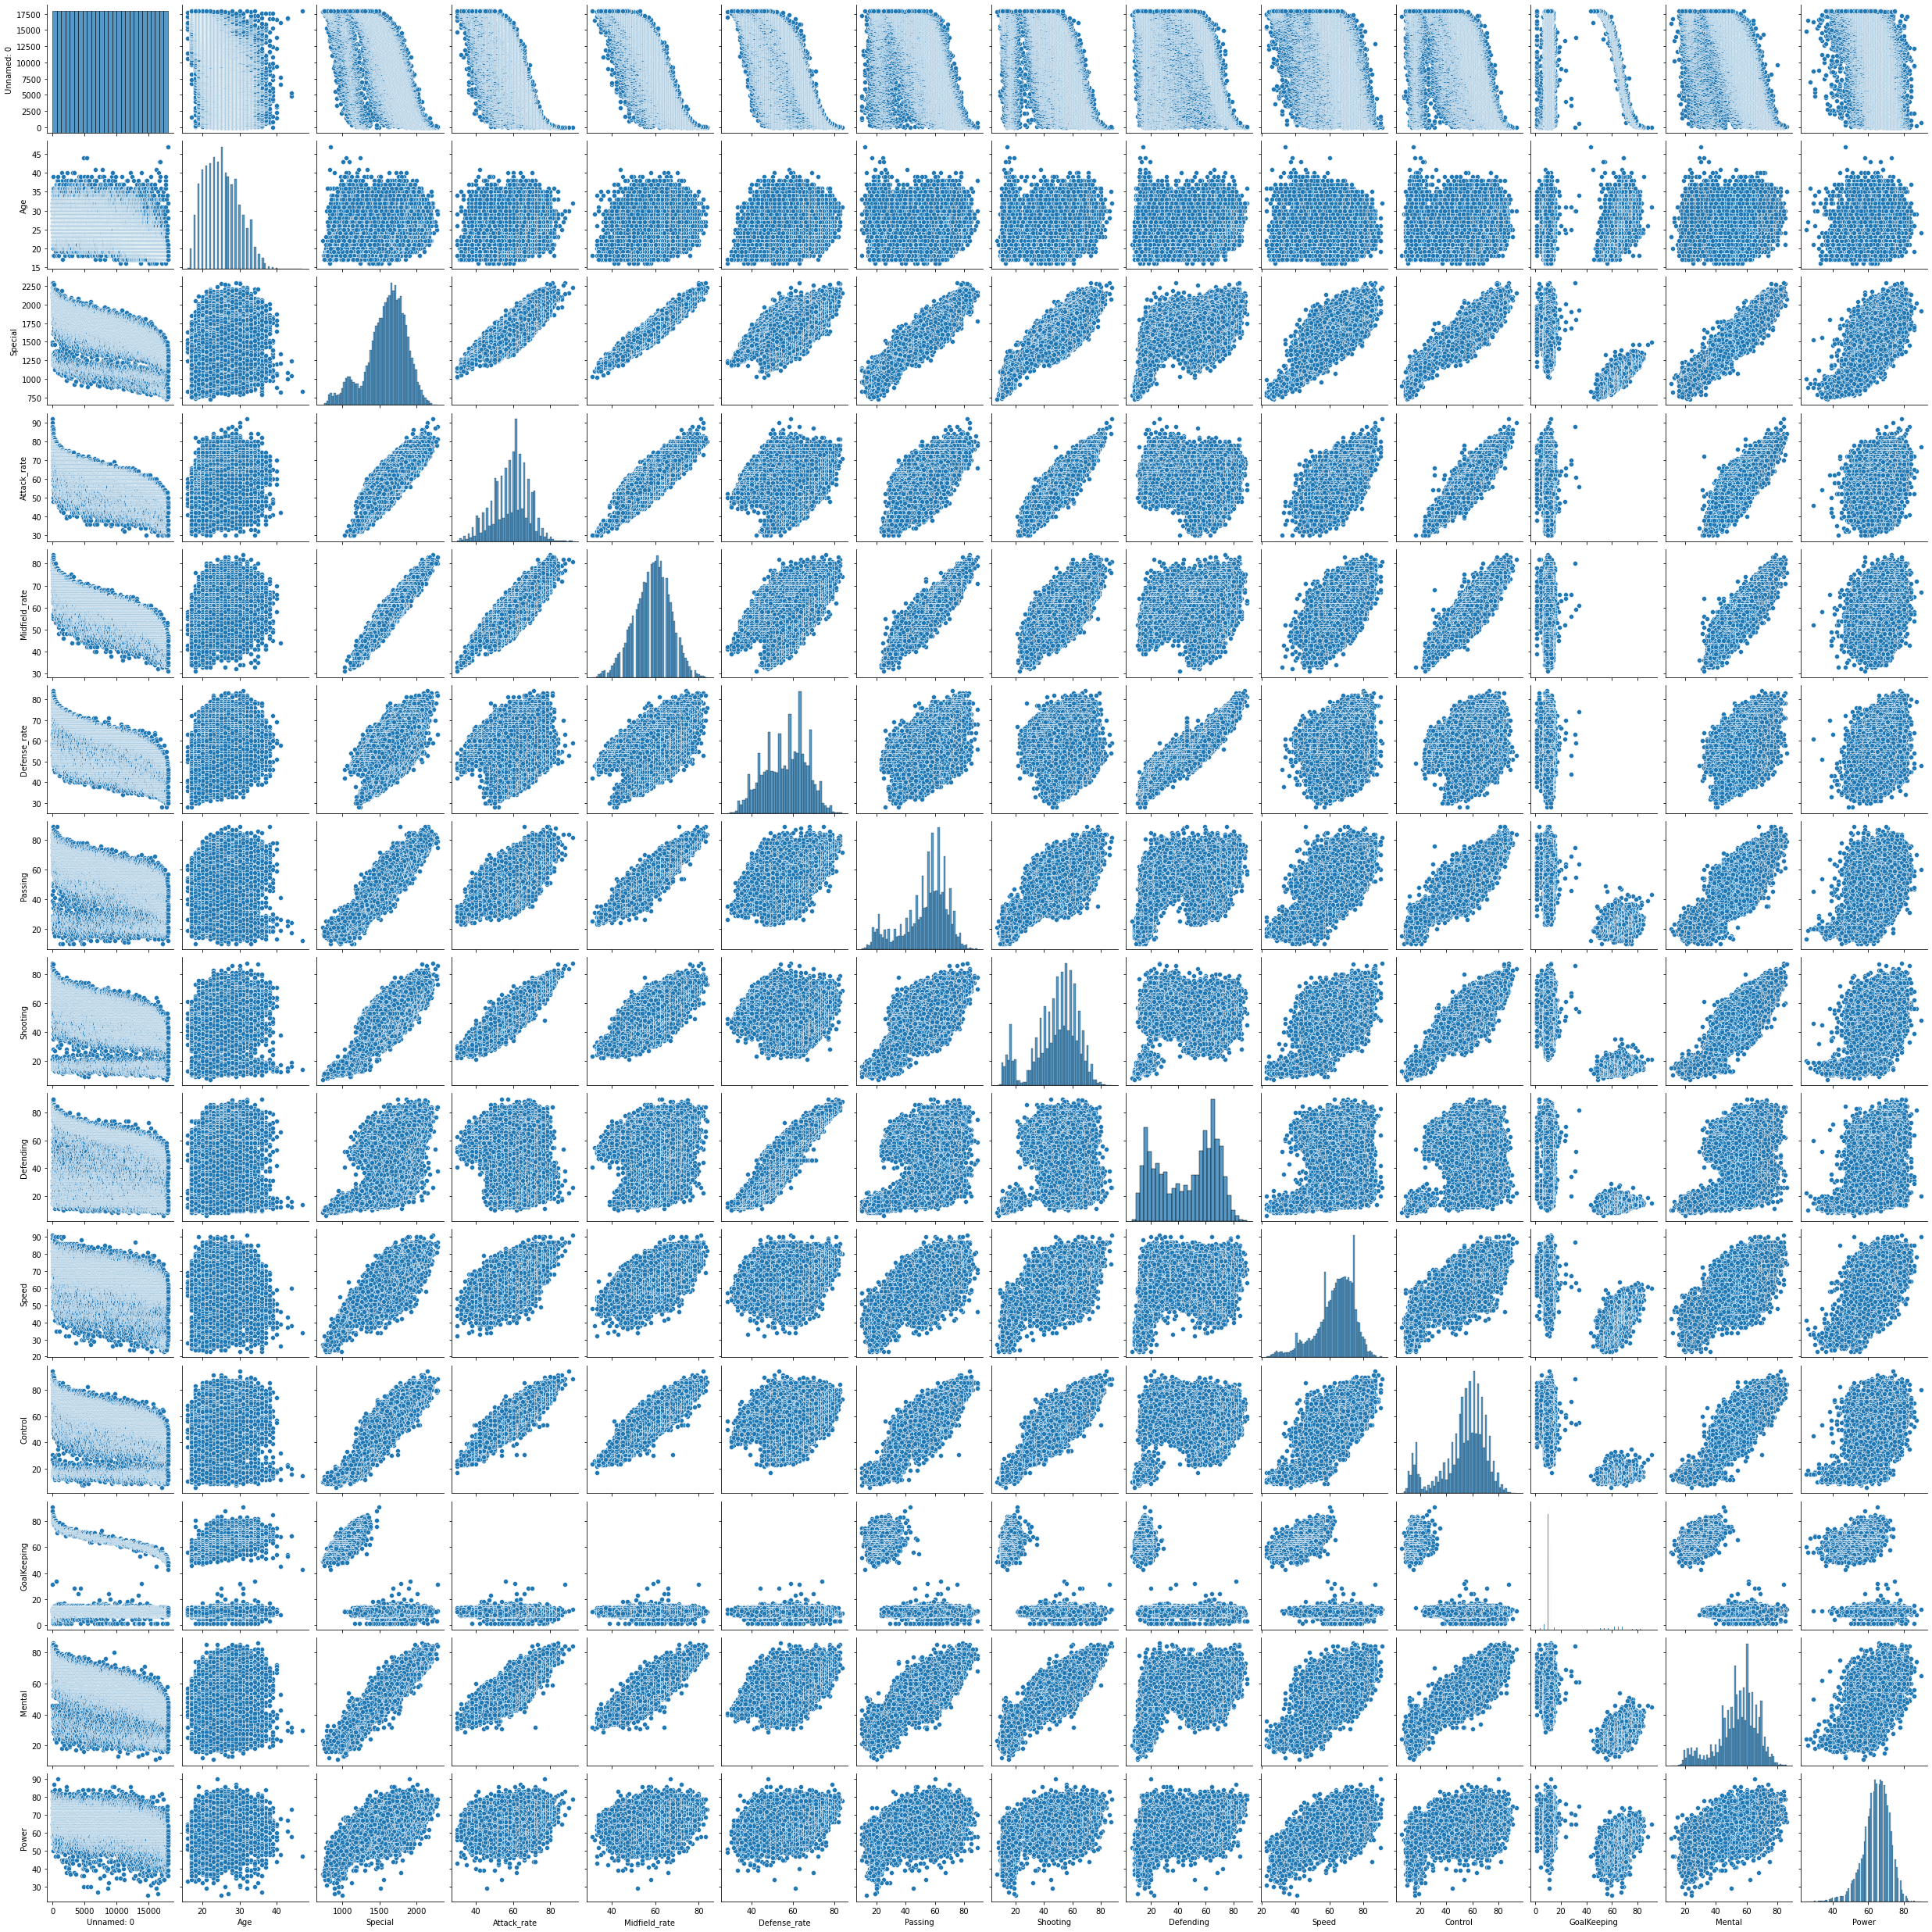

In [58]:
sns.pairplot(data=df.drop(['Avg_rating', 'Value', 'Wage'],axis=1))
plt.show()

In [59]:
teams = ['Manchester City', 'FC Barcelona', 'Chelsea', 'Juventus']
reducedDF = df.loc[df['Club'].isin(teams)]

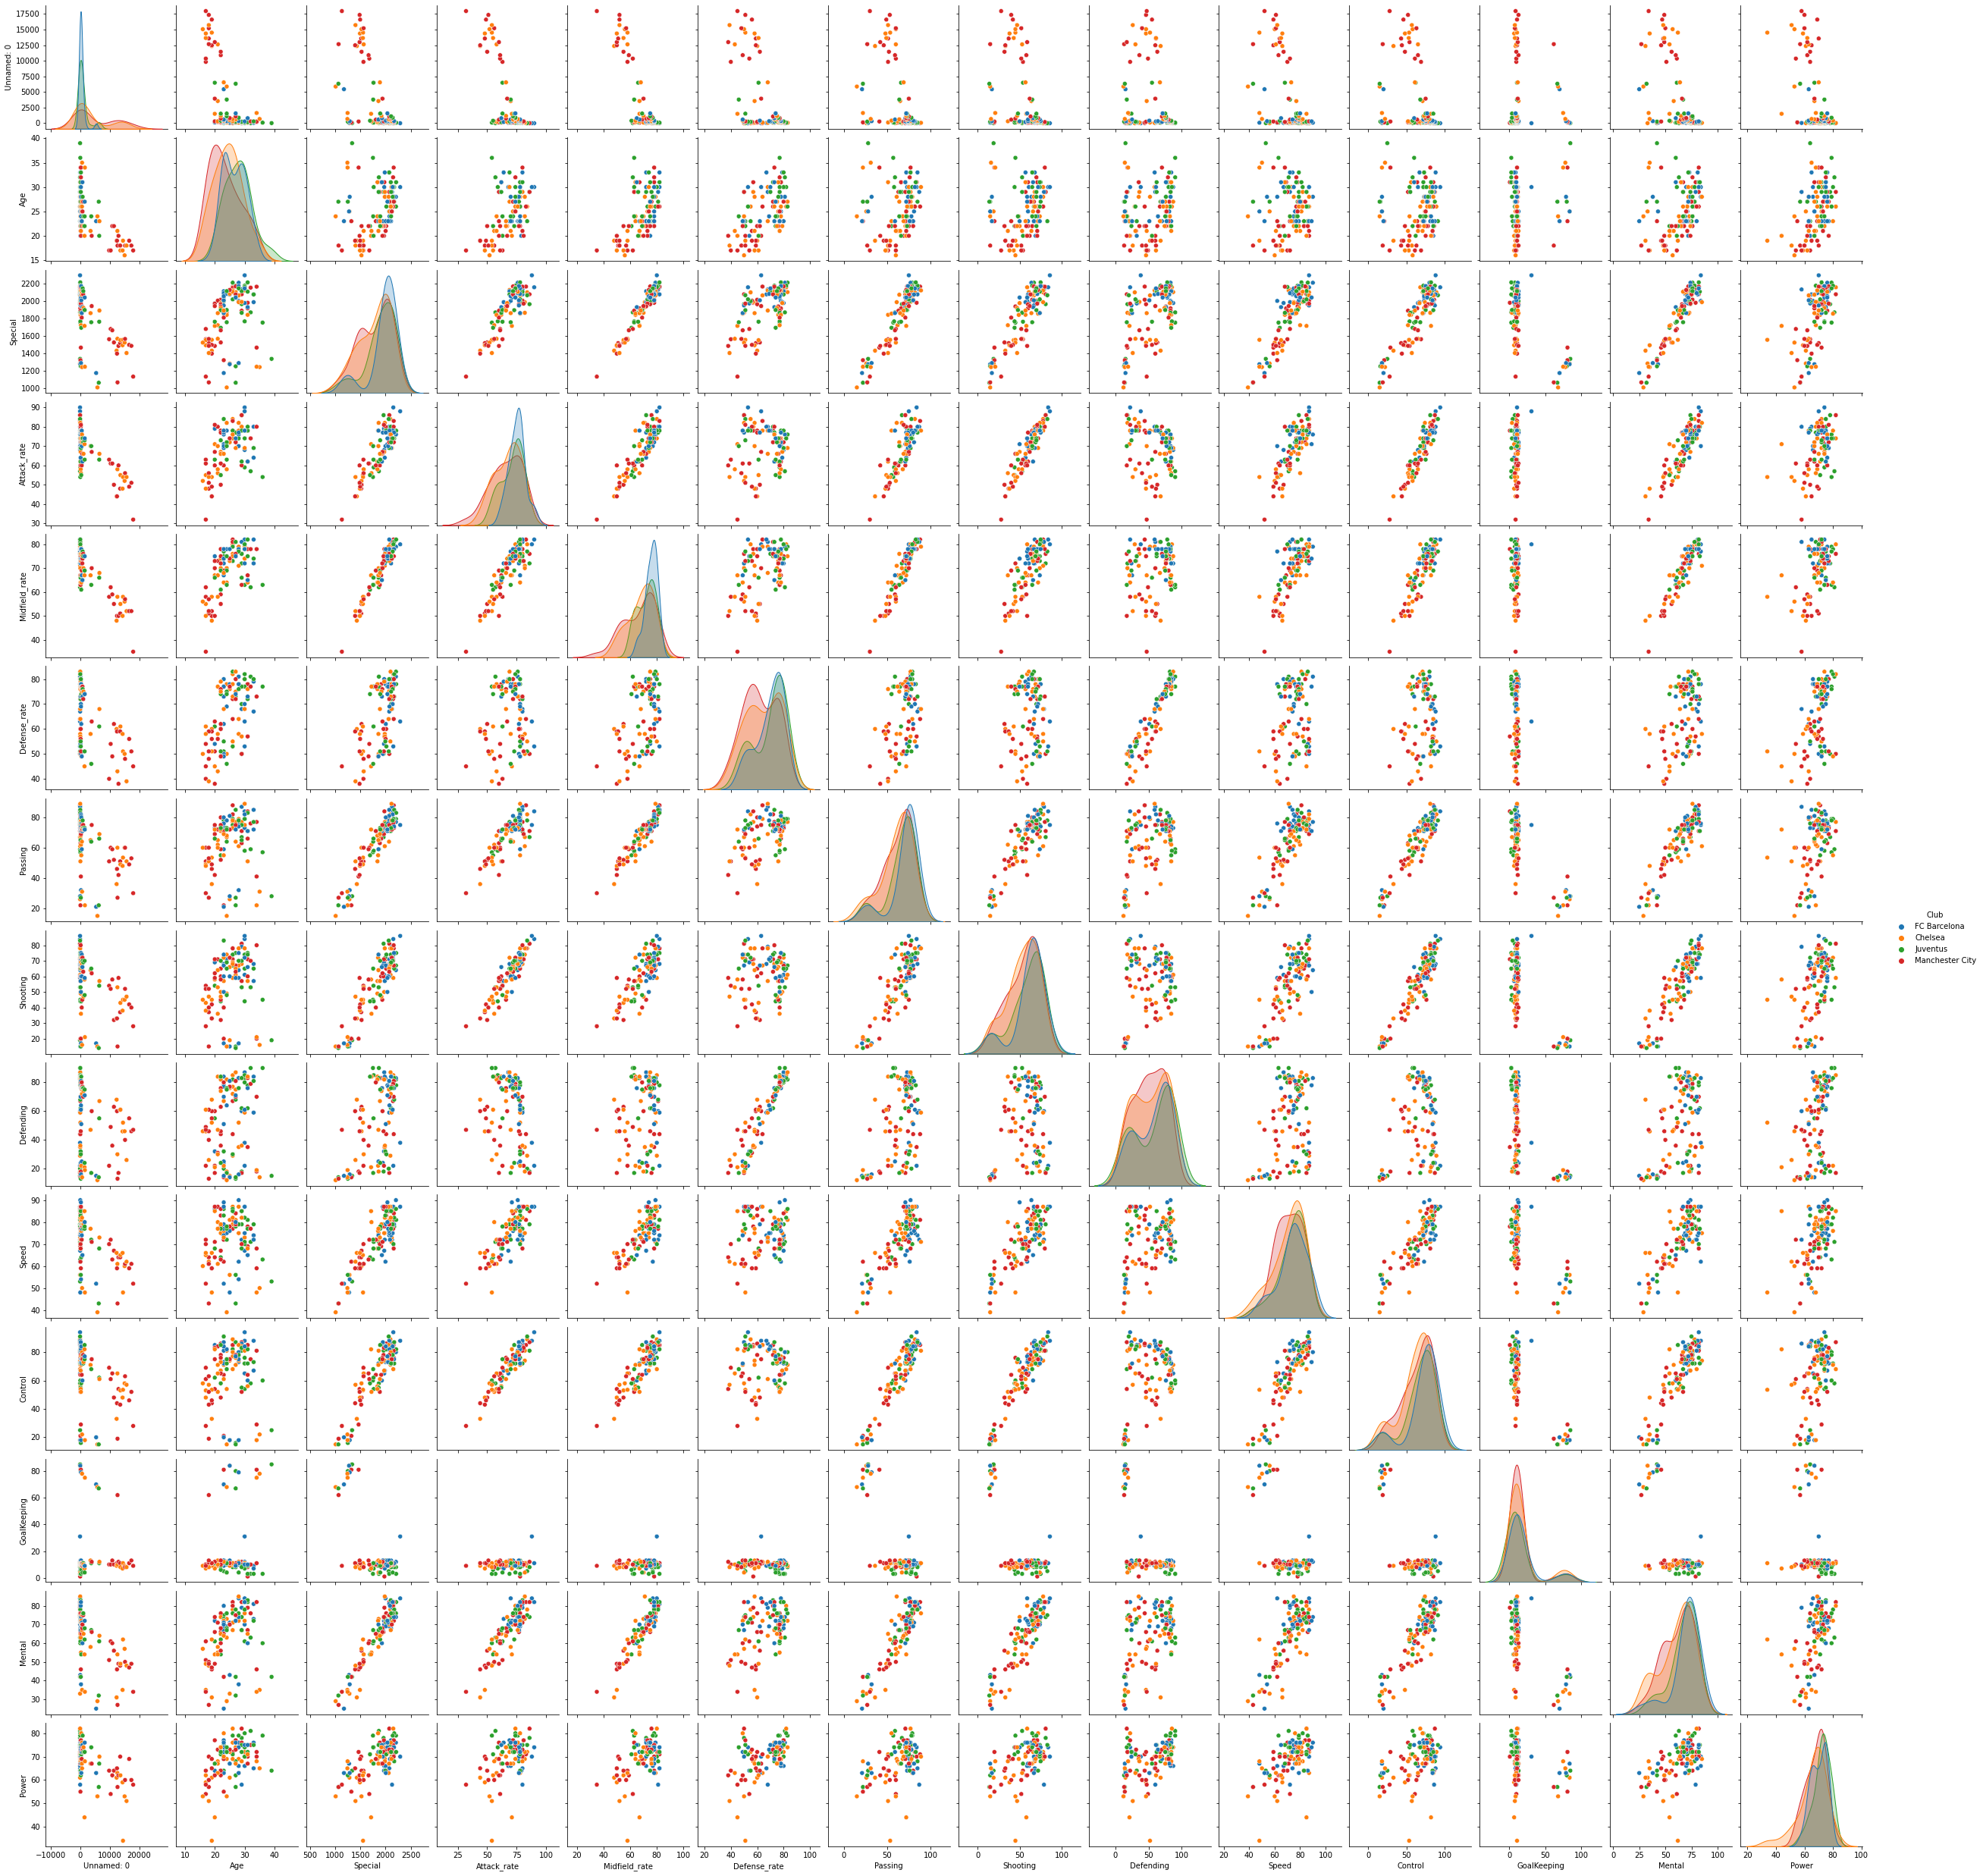

In [60]:
sns.pairplot(data=reducedDF.drop(['Avg_rating', 'Value', 'Wage'],axis=1), hue='Club')
plt.show()

# Club vs Attack Rate

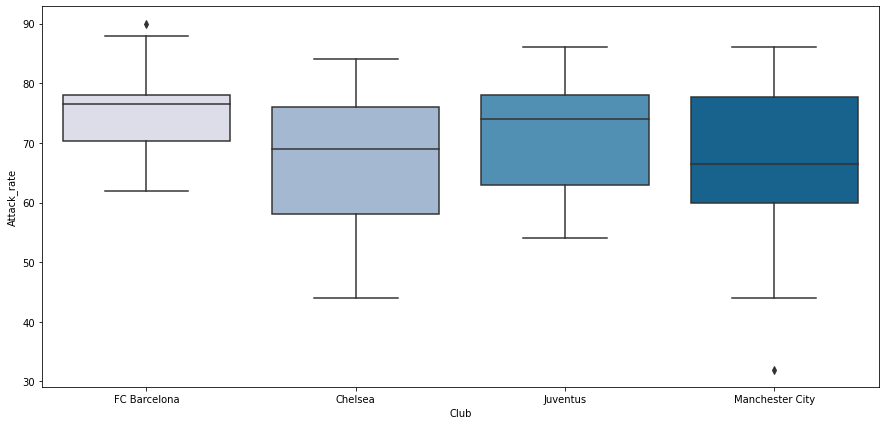

In [61]:
plt.figure(figsize=(15,7))
sns.boxplot(reducedDF["Club"],reducedDF["Attack_rate"],palette="PuBu")
plt.show()

Barcelona has the highest average attack rate among the 4.  The others will want to be mindful when they face them and concentrate on their defense.

# Club vs Midfield Rate

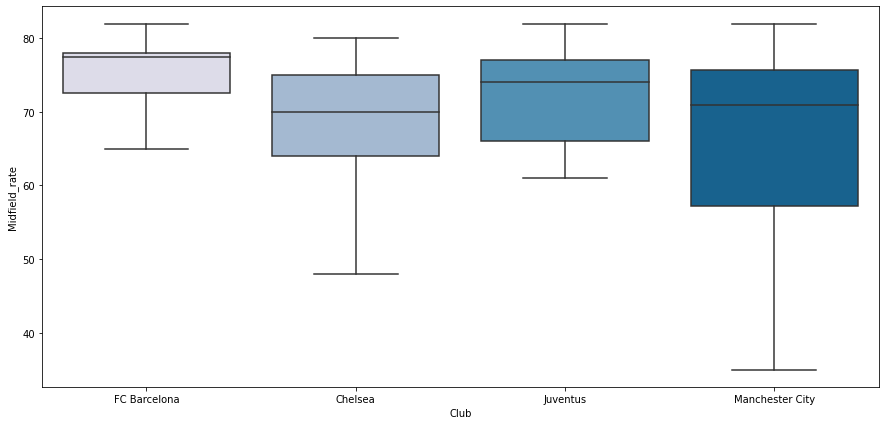

In [62]:
plt.figure(figsize=(15,7))
sns.boxplot(reducedDF["Club"],reducedDF["Midfield_rate"],palette="PuBu")
plt.show()

# Club vs Defense Rate

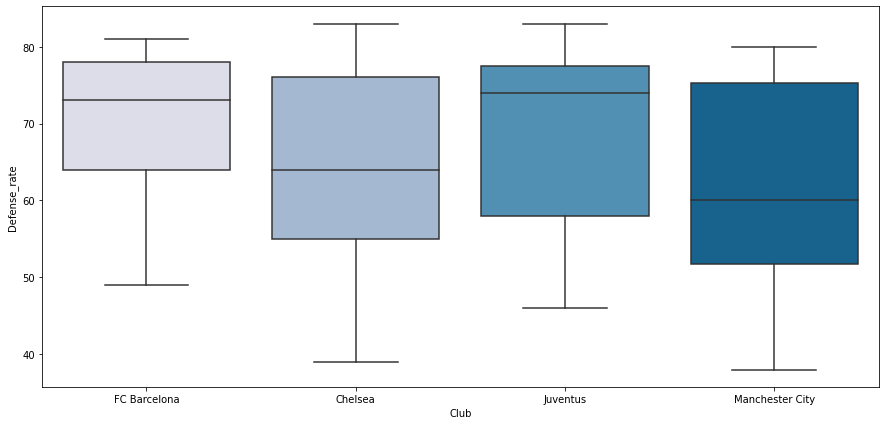

In [63]:
plt.figure(figsize=(15,7))
sns.boxplot(reducedDF["Club"],reducedDF["Defense_rate"],palette="PuBu")
plt.show()

# Club vs Value

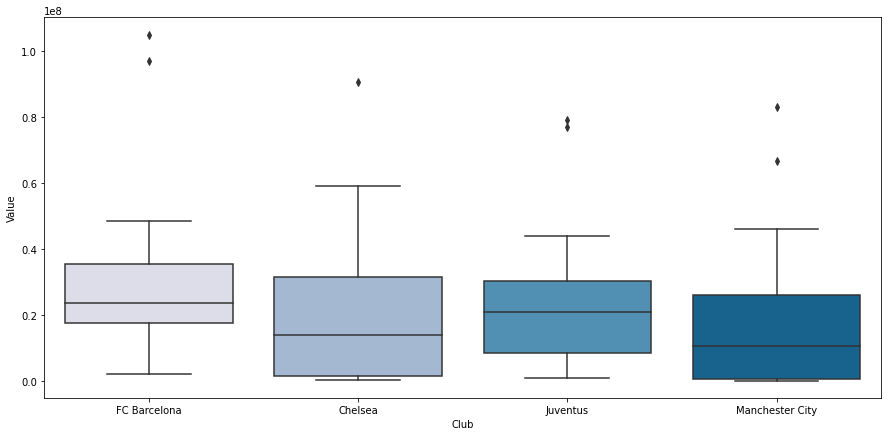

In [64]:
plt.figure(figsize=(15,7))
sns.boxplot(reducedDF["Club"],reducedDF["Value"],palette="PuBu")
plt.show()

In [65]:
reducedDF[['Value', 'Wage', 'Club']].groupby('Club').sum()

Value     Wage
Club                               
Chelsea          673085000  3537000
FC Barcelona     744500000  4792000
Juventus         617099999  3165000
Manchester City  578215000  3152000

Barcelona spends significantly more money on its players wages than other teams and has the greatest player value.  However the other teams have a better ratio of Value/Wage, showing that the extra bit of performance that Barcelonas team members have, comes with a higher cost.

In [66]:
reducedDF[reducedDF['Club'] == 'FC Barcelona'].describe()

Unnamed: 0   Age        Value      Wage  Special  Attack_rate  \
count       25.00 25.00        25.00     25.00    25.00        22.00   
mean       503.80 26.52  29780000.00 191680.00  1961.16        75.18   
std       1082.26  3.65  24274077.39 116217.01   286.40         6.73   
min          1.00 20.00   2000000.00  47000.00  1173.00        62.00   
25%         78.00 23.00  17500000.00 135000.00  1969.00        70.25   
50%        231.00 27.00  23500000.00 150000.00  2037.00        76.50   
75%        358.00 30.00  35500000.00 215000.00  2109.00        78.00   
max       5444.00 33.00 105000000.00 565000.00  2291.00        90.00   

       Midfield_rate  Defense_rate  Passing  Shooting  Defending  Speed  \
count          22.00         22.00    25.00     25.00      25.00  25.00   
mean           75.77         69.68    69.96     61.32      57.24  74.12   
std             4.48         10.32    17.22     18.83      25.78  11.33   
min            65.00         49.00    21.00     15.00      14.00  48.00   
25%            72.50         64.00    72.00     59.00      32.00  72.00   
50%            77.50         73.00    74.00     67.00      64.00  75.00   
75%            78.00         78.00    78.00     71.00      78.00  80.00   
max            82.00         81.00    87.00     86.00      87.00  90.00   

       Control  GoalKeeping  Mental  Power  Avg_rating  
count    25.00        25.00   25.00  25.00       25.00  
mean     71.08        19.48   69.20  69.96       84.20  
std      21.31        22.44   14.31   5.43        4.26  
min      18.00         7.00   25.00  58.00       74.00  
25%      72.00        10.00   69.00  66.00       82.00  
50%      75.00        11.00   72.00  70.00       84.00  
75%      84.00        13.00   79.00  75.00       87.00  
max      94.00        84.00   84.00  77.00       93.00

In [67]:
reducedDF[reducedDF['Club'] == 'Chelsea'].describe()

Unnamed: 0   Age       Value      Wage  Special  Attack_rate  \
count       33.00 33.00       33.00     33.00    33.00        29.00   
mean      3737.67 24.36 20396515.15 107181.82  1779.91        67.21   
std       5665.42  4.78 21198294.50  78935.28   317.11        11.08   
min          7.00 16.00   260000.00   4000.00  1008.00        44.00   
25%        109.00 21.00  1400000.00  40000.00  1549.00        58.00   
50%        529.00 24.00 14000000.00 105000.00  1858.00        69.00   
75%       5876.00 27.00 31500000.00 170000.00  2069.00        76.00   
max      15718.00 35.00 90500000.00 295000.00  2154.00        84.00   

       Midfield_rate  Defense_rate  Passing  Shooting  Defending  Speed  \
count          29.00         29.00    33.00     33.00      33.00  33.00   
mean           67.79         64.34    60.83     53.58      52.63  71.00   
std             9.41         13.15    18.18     18.33      25.77  12.35   
min            48.00         39.00    15.00     15.00      12.00  39.00   
25%            64.00         55.00    51.00     45.00      29.00  65.00   
50%            70.00         64.00    65.00     57.00      52.00  75.00   
75%            75.00         76.00    73.00     68.00      76.00  80.00   
max            80.00         83.00    89.00     78.00      87.00  87.00   

       Control  GoalKeeping  Mental  Power  Avg_rating  
count    33.00        33.00   33.00  33.00       33.00  
mean     61.80        17.85   60.67  65.85       79.55  
std      20.57        22.19   15.94   9.98        7.14  
min      15.00         4.00   29.00  34.00       66.00  
25%      53.47         9.00   54.00  62.00       74.00  
50%      68.00        10.00   65.00  68.00       81.00  
75%      76.00        12.00   72.00  72.00       85.00  
max      89.00        84.00   85.00  82.00       90.00

In [68]:
reducedDF[reducedDF['Club'] == 'Juventus'].describe()

Unnamed: 0   Age       Value      Wage  Special  Attack_rate  \
count       26.00 26.00       26.00     26.00    26.00        23.00   
mean       937.04 27.77 23734615.35 121730.77  1898.96        71.22   
std       1799.10  4.48 20236065.71  58305.79   299.85         9.30   
min          9.00 20.00   700000.00  34000.00  1062.00        54.00   
25%         85.50 24.00  8500000.00  88250.00  1761.00        63.00   
50%        189.50 27.50 20750000.00 112500.00  1978.00        74.00   
75%        762.50 30.00 30125000.00 156250.00  2110.75        78.00   
max       6486.00 39.00 79000000.00 275000.00  2210.00        86.00   

       Midfield_rate  Defense_rate  Passing  Shooting  Defending  Speed  \
count          23.00         23.00    26.00     26.00      26.00  26.00   
mean           72.00         69.39    66.19     59.15      57.42  73.50   
std             6.68         12.13    16.98     19.47      28.92  10.79   
min            61.00         46.00    22.00     14.00      13.00  43.00   
25%            66.00         58.00    60.25     49.25      25.50  68.50   
50%            74.00         74.00    72.50     66.00      71.50  77.00   
75%            77.00         77.50    77.75     73.50      81.75  80.50   
max            82.00         83.00    85.00     83.00      90.00  86.00   

       Control  GoalKeeping  Mental  Power  Avg_rating  
count    26.00        26.00   26.00  26.00       26.00  
mean     67.08        15.62   67.27  72.23       82.85  
std      20.65        23.07   13.02   5.90        4.92  
min      15.00         3.00   32.00  57.00       69.00  
25%      58.50         5.25   61.25  70.25       81.25  
50%      72.50         8.50   71.50  72.00       83.50  
75%      81.75        11.00   76.00  75.00       85.00  
max      91.00        85.00   83.00  81.00       90.00

In [69]:
reducedDF[reducedDF['Club'] == 'Manchester City'].describe()

Unnamed: 0   Age       Value      Wage  Special  Attack_rate  \
count       33.00 33.00       33.00     33.00    33.00        30.00   
mean      5199.27 23.45 17521666.67  95515.15  1785.27        65.90   
std       6567.62  5.15 20613445.43  83302.96   321.52        13.31   
min         11.00 17.00    60000.00   5000.00  1066.00        32.00   
25%        161.00 19.00   625000.00  15000.00  1515.00        60.00   
50%        756.00 22.00 10500000.00  95000.00  1913.00        66.50   
75%      11445.00 27.00 26000000.00 140000.00  2073.00        77.75   
max      17961.00 34.00 83000000.00 325000.00  2164.00        86.00   

       Midfield_rate  Defense_rate  Passing  Shooting  Defending  Speed  \
count          30.00         30.00    33.00     33.00      33.00  33.00   
mean           66.43         61.93    62.36     54.48      51.00  71.03   
std            11.94         12.48    16.91     18.49      23.06  10.80   
min            35.00         38.00    22.00     15.00      13.00  43.00   
25%            57.25         51.75    51.00     40.00      35.00  63.00   
50%            71.00         60.00    69.00     59.00      49.00  71.00   
75%            75.75         75.25    75.00     71.00      70.00  78.00   
max            82.00         80.00    88.00     81.00      83.00  87.00   

       Control  GoalKeeping  Mental  Power  Avg_rating  
count    33.00        33.00   33.00  33.00       33.00  
mean     63.82        16.15   62.24  68.09       78.24  
std      19.99        19.10   14.72   6.90        8.45  
min      19.00         1.00   27.00  54.00       60.00  
25%      52.00        10.00   49.00  64.00       72.00  
50%      69.00        11.00   66.00  70.00       82.00  
75%      78.00        12.00   74.00  73.00       85.00  
max      87.00        81.00   82.00  82.00       90.00

# Conclusion
## Insights and recommendations:
FC barcelona out performs most of the other teams in most metrics, having the highest averaage Attack, Defense, and Midfield rates, as well as Passing, Shooting, and Average Player Rating.  However their Goalkeeping rating is less than or equal than all but Manchester City's.

Chelsea and Manchester having slightly weaker attack scores, so they could benefit from training or rectuiting more in that area.  Looking at the team vs value graph, Barcelona has the greatest value, which reflects in its higher performance ratings.  In order to compete against them other teams will either have to improve the team members it already has, or try and recruit more skilled players, which could cost more money.